In [4]:
%matplotlib inline
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from utils import read_csv_custom, tsne_plot
from config import TSFM_TRAIN_DIR, TSFM_VAL_DIR, X_TRAIN_PATH, Y_TRAIN_PATH, X_VAL_PATH

In [3]:
def run_tsfm(transformer, X_train, X_val, y_train=None):
    if y_train is None:
        X_train_new = transformer.fit_transform(X_train)
    else:
        X_train_new = transformer.fit_transform(X_train, y_train)
    X_val_new = transformer.transform(X_val)
    return X_train_new, X_val_new
    
def save_tsfm(X_train, X_val, suffix):
    np.savetxt(TSFM_TRAIN_DIR/f'{suffix}.csv', X_train, delimiter=',')
    np.savetxt(TSFM_VAL_DIR/f'{suffix}.csv', X_val, delimiter=',')
    
def tsfm(transformer, X_train, X_val, suffix, **kwargs):
    save_tsfm(*run_tsfm(transformer, X_train, X_val, **kwargs), suffix)

In [5]:
X_train = read_csv_custom(X_TRAIN_PATH)

In [6]:
X_val = read_csv_custom(X_VAL_PATH)

In [6]:
y_train = pd.read_csv(Y_TRAIN_PATH, header=None)

In [6]:
# scaler = StandardScaler()
# X_train_std, X_val_std = run_tsfm(scaler, X_train, X_val)
# save_tsfm(X_train_std, X_val_std, 'std')

In [21]:
# X_train_std = np.loadtxt(TSFM_TRAIN_DIR/'std.csv', delimiter=',')
# X_val_std = np.loadtxt(TSFM_VAL_DIR/'std.csv', delimiter=',')

# PCA (linear, polynomial, RBF, sigmoid, cos)

In [8]:
# n_components = 50
# kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']
# for k in kernels:
#     transformer = KernelPCA(n_components=n_components, kernel=k, random_state=0)
#     tsfm(transformer, X_train_std, X_val_std, f'pca-{k}')

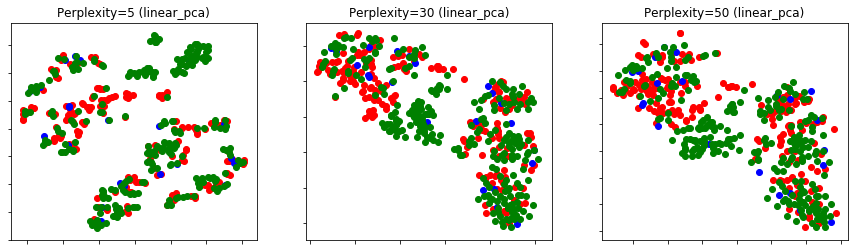

In [2]:
tsne_plot('linear_pca')

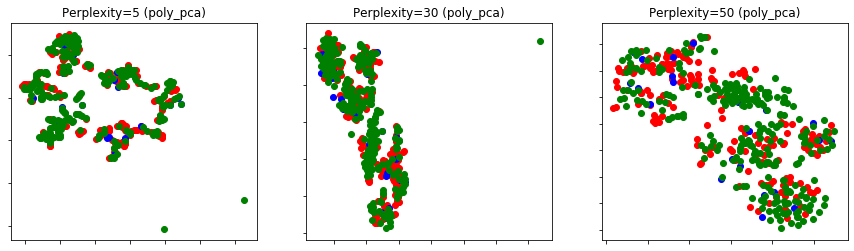

In [3]:
tsne_plot('poly_pca')

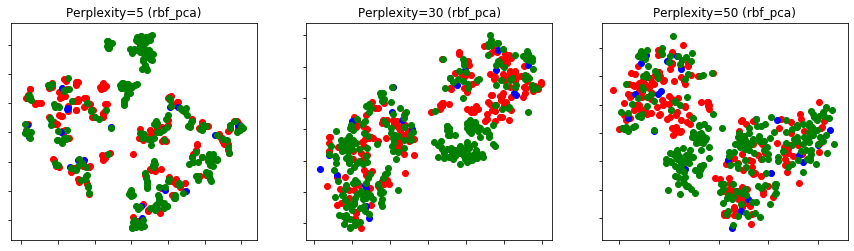

In [12]:
tsne_plot('rbf_pca')

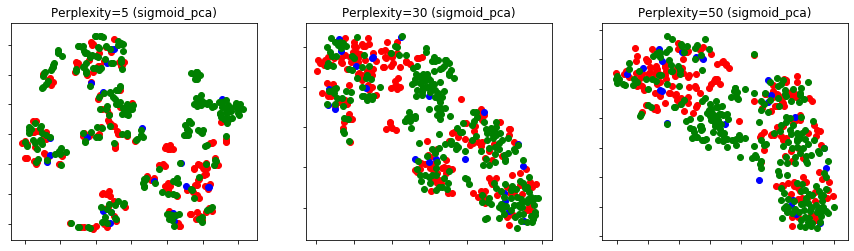

In [13]:
tsne_plot('sigmoid_pca')

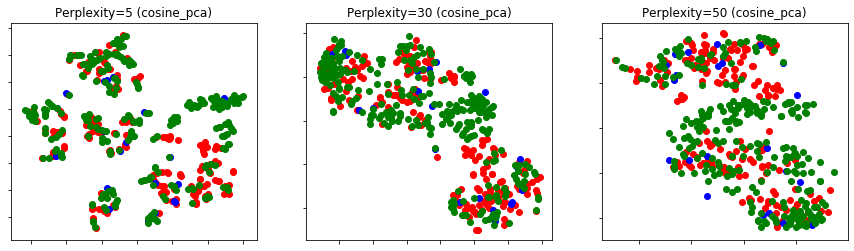

In [14]:
tsne_plot('cosine_pca')

# Linear discriminant analysis

In [29]:
n_components = None
transformer = LinearDiscriminantAnalysis(n_components=n_components)
tsfm(transformer, X_train_std, X_val_std, 'lda', y_train=y_train)

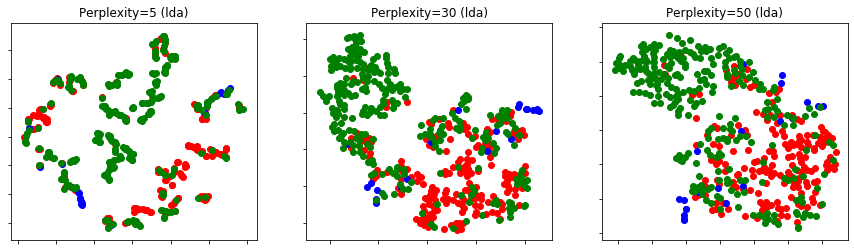

In [30]:
tsne_plot('lda')